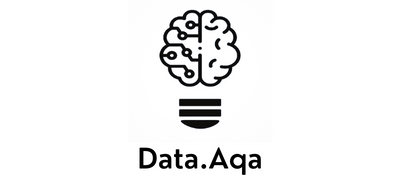

## <font color = #024AAD>Sumário:
1. [Testes de Hipótese](#first-bullet)
2. [Teste-T para uma amostra](#second-bullet)
3. [Teste-T para duas amostras](#third-bullet)
4. [Implementação](#fourth-bullet)
5. [Implementação: Teste-T para uma amostra](#fifth-bullet)
6. [Implementação: Teste-T para duas amostras](#sixth-bullet)

### <font color = #024AAD>O que vimos até aqui no módulo de estatística?
---

    1. Tipos de variáveis
    2. Medidas de Tendência Central
    3. Medidas de Dispersão
    4. Medidas Separatrizes
    5. Probabilidade
    6. Distribuições

Primeira parte:
 - Como descrever um conjunto de dados?

Segunda parte:
 - Como se certificar que essas características representam de fato a realidade, e não são **fruto do acaso**?

#### <font color = #3336FF>Situação Hipotética:
Você trabalha na área de dados de uma empresa do setor de telecomunicações. Buscando aumentar a fidelidade dos clientes, sua chefe decide criar uma nova promoção destinada a clientes com mais de 30 anos, focada em oferecer planos com mais tempo de ligação. Ela argumenta que esse grupo de clientes possui um comportamento distindo do geral no quesito tempo de ligação. Ao ser perguntada como chegou nesta conclusão, ela responde: "Tenho um feeling, ***confia***." Você, sendo uma pessoa orientada por dados, decide fundamentar o feeling da sua chefe.
    
Você tem acesso à uma base da empresa com informações de quanto tempo 500 clientes passa fazendo ligações. Ao calcular a média de tempo de ligação dos dois grupos, você verifica que pessoas com mais de 30 realmente passam mais tempo, em média, no telefone do que os outros. **Como se certificar de que essa diferença existe mesmo, é não é resultado do caso específico desse grupo de clientes?**

# <font color = #0300C3><u>Testes de Hipótese</u><a class="anchor" id="first-bullet"></a>
---

Testes de hipótese são ferramentas da estatística inferencial usadas para, a partir de uma ou mais amostras, tirar conclusões sobre algum parâmetro da população ou sobre as distribuições das mesmas.

<font color = #3336FF>**Elementos de um teste de hipótese:**<font color = 'black'>
- **Suposição:** Pergunta que motivou o teste;
- **Estatística teste:** Parâmetro que será testado (médias, correlações, proporções, etc.);
- **Hipótese Nula** $H_0$: Modelo do sistema assumindo que a suposição feita não é verdadeira;
    - Exemplo: $H_0$: $\mu_1 = \mu_2$
- **Hipótese Alternativa** $H_1$: Modelo do sistema assumindo que a suposição feita é verdadeira;
    - Exemplo: $H_1$: $\mu_1 \neq \mu_2$
- **Nível de Significância $\alpha$:** Probabilidade máxima aceitável de cometer um **Erro do Tipo I***;
- **Valor Crítico:** ponto(s) no eixo x em que a hipótese nula deixa de ser aceita;
- $p-valor$: Probabilidade de encontrar uma estatística teste igual - ou maior - que a observada caso $H_0$ seja verdadeira.

O que o teste de hipótese faz é calcular a probabilidade de encontrar uma estatística teste igual - ou maior - que a *observada* sob a condição de $H_0$ ser verdadeira ($p-valor$). Se esta probabilidade for menor do que o nível de significância estabelecido (se a estatística teste estiver além do valor crítico), nós podemos rejeitar $H_0$. Caso o contrário, não podemos rejeitar $H_0$.

Isso pode parecer bem abstrato, então vamos tentar visualizar essa situação.

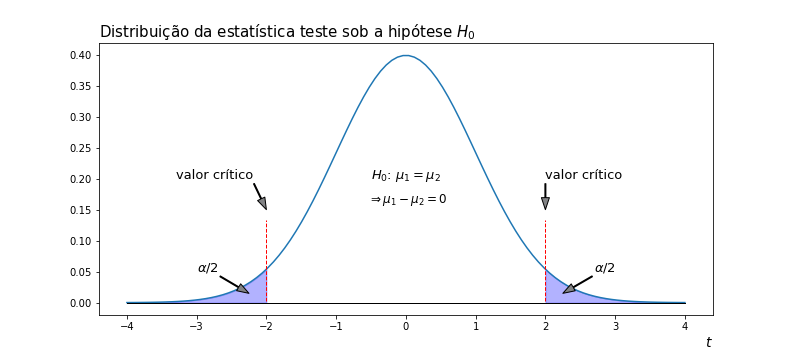

Na imagem temos a distribuição de probabilidades da diferença entre as médias $(\mu_1 - \mu_2)$ considerando que a média das diferenças é zero $(\overline{\mu_1 - \mu_2} = 0)$.

$\mu_1 - \mu_2$ é a nossa estatística teste, para facilitar a compreensão podemos pensar nessa diferença como uma variável, $k$, por exemplo.

Para cada $t$ no eixo-x, temos uma probabilidade associada no eixo-y. O $p-valor$ é o ponto no eixo-y correspondente ao $t$ observado.

Por convenção, se o $p-valor$ for menor que $\alpha$ dizemos que a **estatística teste** é **<font color = '#3336FF'> estatisticamente significante<font color = 'b'>**, ou seja, rejeitamos $H_0$.
    
Caso contrário $(p-valor > \alpha)$, não podemos rejeitar $H_0$.

**distribuição de probabilidades da diferença entre as médias...**

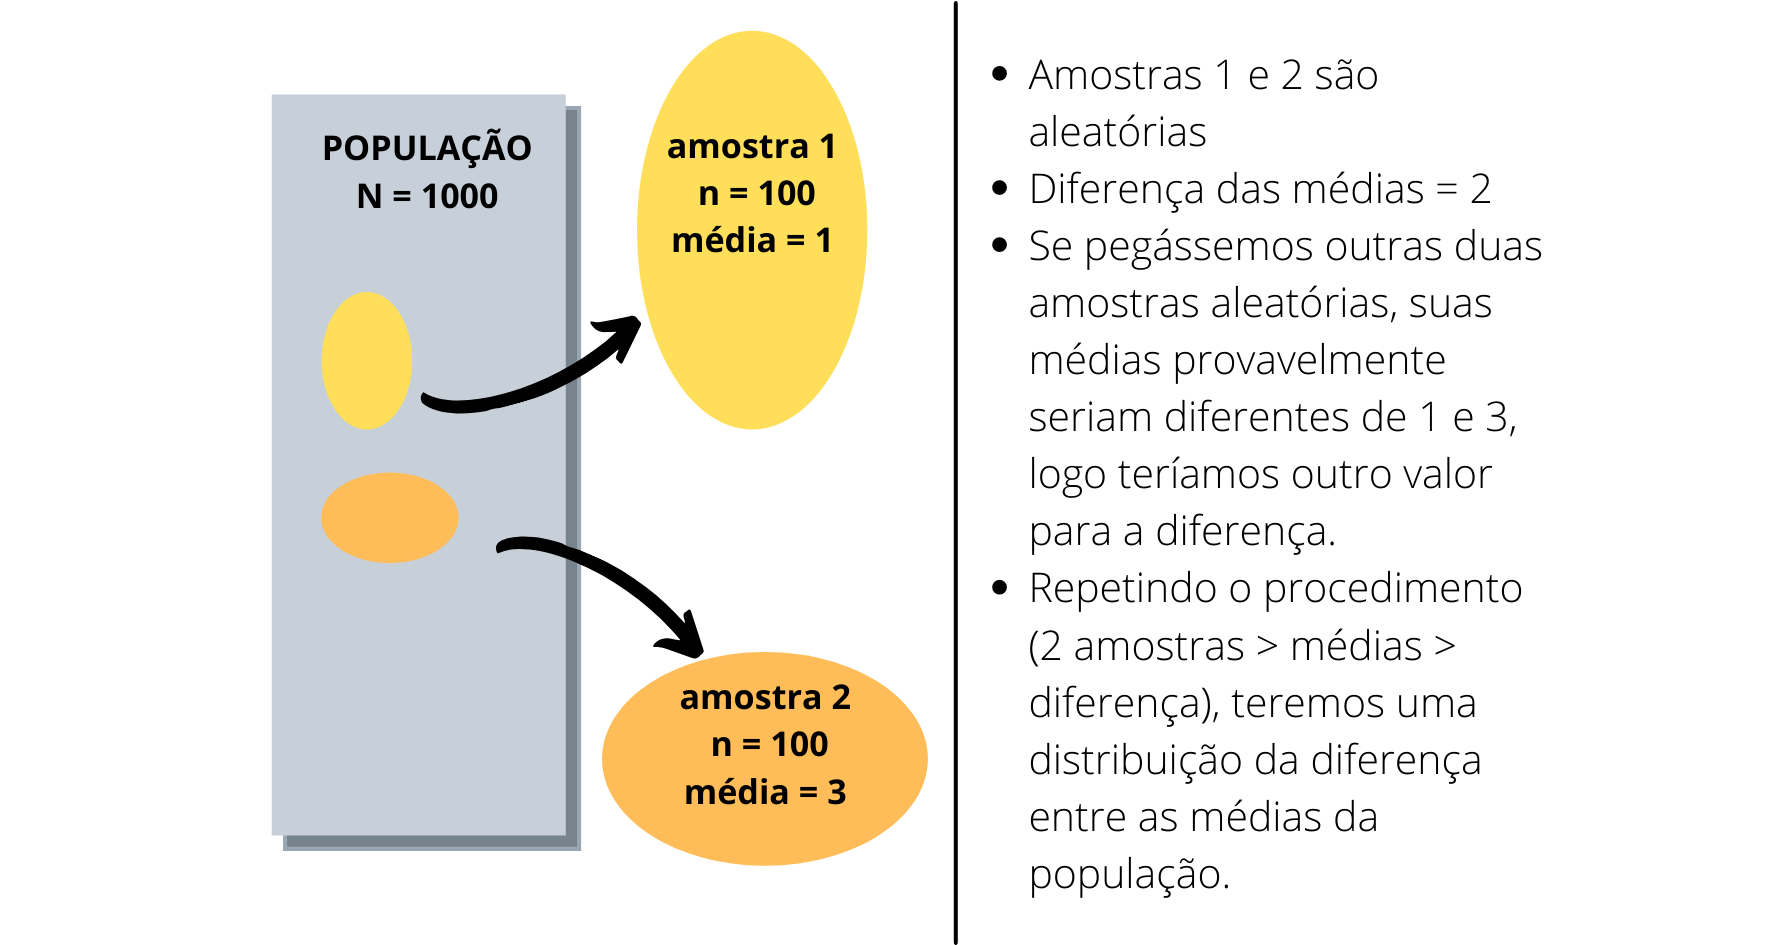

#### $\diamond$ <font color = #3336FF>**$H_0$ e $H_1$...**<font color = 'black'>
Para tentar exemplificar melhor a ideia por trás da Hipótese Nula e Hipótese Alternativa, vamos pensar em um tribunal.

Você acredita e quer provar que o réu deste tribunal é culpado, esta é a suposição que fazemos. A Hipótese Nula, portanto, é de que o réu é inocente. A função do tribunal é fundamentar a acusação e provar que a hipótese nula é falsa, ou seja, o réu não é inocente.

Esta lógica (**o réu é inocente até que se prove o contrário / a hipótese nula é verdadeira até que se prove falsa**), vem do *Princípio da Falsificação*, do filósofo Karl Popper. Este princípio nos diz que não é possível provar uma hipótese de maneira conclusiva, mas que é possível categoricamente negar uma.

<br>

<font color = #3336FF>**Tipos de Erros**<font color = 'black'>
    
- **Erro do Tipo I:** Rejeita-se $H_0$ quando ela é verdadeira (Falso Positivo);
- **Erro do Tipo II:** Não se rejeita $H_0$ quando $H_1$ é verdadeira (Falso Negativo).
---
- **Nível de Significância - $\alpha$:** Probabilidade de cometer um **Erro do Tipo I**;
- **$\beta$**: Probabilidade de cometer um **Erro do Tipo II**;
- **Potência ($1 - \beta$):** Probabilidade de **não** cometer um **Erro do Tipo II**.

<font color = #3336FF>**Tipos de teste:**<font color = 'black'>
    
- **Paramétricos:** Assumem que os dados seguem uma distribuição aproximadamente normal;
- **Não-paramétricos:** Dados podem seguir qualquer distribuição;
---    
- **Bicaudais:** Testes em que o operador de comparação da $H_0$ é $=$ ou $\neq$
    - Exemplo: $H_0$: $\mu_0 = \mu_1$ ou $\mu_0 \neq \mu_1$
- **Unicaudais:** Testes em que o operador de comparação da $H_0$ é  $\leq$ ou  $\geq$
    - Exemplo: $H_0$: $\mu_0 \leq \mu_1$ ou $\mu_0 \geq \mu_1$

<font color = #3336FF>**Tipos de teste:**<font color = 'black'>
---
Existem vários tipos de teste de hipótese, os listados abaixo são apenas alguns deles

- **Paramétricos:**
    - Teste-T para uma amostra;
    - Teste-T para duas amostras;
---
- **Não Paramétricos:**
    - Teste Qui-Quadrado;
    - Teste de Wilcoxon;
    - Teste de Mann-Whitney

## <font color = #0300C3>Teste-T<a class="anchor" id="second-bullet"></a>
---
**Testes-t** geralmente são utilizados para testar a diferença entre médias. Essa diferença pode ser entre a média de uma amostra e da população ou entre duas amostras.

Ele possui os mesmos elementos mencionados anteriormente, e a sua estatística teste é conhecida como *estatística T*.

Por ser uma teste paramétrico, os dados que serão testados devem seguir uma distribuição aproximadamente normal.

### <font color = #0300C3>Teste-T para uma amostra <a class = 'anchor' id = 'second-bullet'></a>

A formula da estatística T quando estamos testando a média de **uma amostra** é a seguinte:

<center><font size = 5> $ t = \frac{\overline{x} - \mu_0}{\frac{s}{\sqrt{n}}} $

Onde:
* $\overline{x}$: média da amostra
* $\mu_0$: média esperada da população
* $s$: desvio padrão da amostra
* $n$: tamanho da amostra

### <font color = #0300C3>Teste-T para duas amostras<a class = 'anchor' id = 'third-bullet'>

Quando estamos testando a diferença **entre duas amostras**, a fórmula da estatística T é a seguinte:

<center><font size = 5>$ t = \frac{(\overline{x_1} - \overline{x_2})}{\sqrt{s^{2}(\frac{1}{n_1}+\frac{1}{n_2})}} $

<br>

Agora sim, vamos para o código.

### <font color = #024AAD>Implementação<a class="anchor" id="fourth-bullet"></a>
---
Para demonstrar a implementação do teste, vamos voltar à situação hipotética que foi colocada no inicio da aula em que queríamos testar se pessoas com mais de 30 anos fazem mais ligações do que a média

``` 
Você trabalha na área de dados de uma empresa do setor de telecomunicações. Buscando aumentar a fidelidade dos clientes, sua chefe decide criar uma nova promoção destinada a clientes com mais de 30 anos, focada em oferecer planos com mais tempo de ligação. Ela argumenta que esse grupo de clientes possui um comportamento distindo do geral no quesito tempo de ligação. Ao ser perguntada como chegou nesta conclusão, ela responde: "Tenho um feeling, confia." Você, sendo uma pessoa orientada por dados, decide fundamentar o feeling da sua chefe.

Você tem acesso à uma base da empresa com informações de quanto tempo 500 clientes passam fazendo ligações. Ao calcular a média de tempo de ligação dos dois grupos, você verifica que as pessoas com mais de 30 realmente passam mais tempo, em média, no telefone do que os outros. Como se certificar de que essa diferença existe mesmo, é não é resultado do caso específico desse grupo de clientes?
```

Vamos simular alguns dados supondo que o tempo de ligação ($T$) segue uma distribuição normal $T \sim N(100, 15)$. A simulação será feita assumindo que a diferença existe.

In [1]:
# Importando bibliotecas
import scipy.stats as st
import pingouin as pg
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Simulando duas populações
# distribuição 1 (loc = 100, scale = 15, size = 10000)
pop_1 = st.norm.rvs(loc = 100, scale = 15, size = 10000)

# distribuição 2 (>30 anos) (loc = 115, scale = 20, size = 5000)
pop_2 = st.norm.rvs(loc = 115, scale = 20, size = 5000)

# população (np.concatenate)
pop = np.concatenate((pop_1, pop_2))

# computando média da população
mu_pop = np.mean(pop)

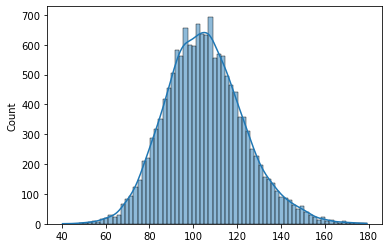

In [5]:
# Visualizando distribuição populacional
sns.histplot(pop, kde = True)

plt.show()

In [12]:
# Retirando uma amostra aleatória (pessoas com mais de 30 anos presentes na base de 500 clientes) (np.random.choice)
amostra = np.random.choice(pop_2, size = 50)

<AxesSubplot:ylabel='Count'>

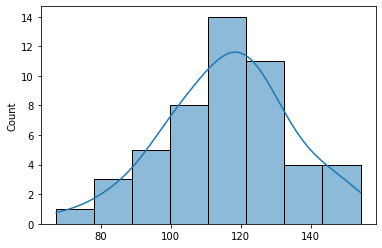

In [13]:
# Visualizando a distribuição da amostra
sns.histplot(amostra, kde = True)

In [14]:
print('A diferença entre a média da população e a média da amostra é de', abs(np.mean(pop) - np.mean(amostra)))
print('Esta diferença pode ser considerada significativa?')

A diferença entre a média da população e a média da amostra é de 11.046346330996968
Esta diferença pode ser considerada significativa?


### <font color = #024AAD>$\rightarrow$ teste-t para uma amostra<a class="anchor" id="fifth-bullet"></a>
---
Iremos utlizar o pacote estatístico `pingouin` para realizar os testes.

In [15]:
pg.ttest(x = amostra, y = mu_pop)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.261506,49,two-sided,0.000092,"[111.07, 121.48]",0.602668,247.678,0.986676


### <font color = #024AAD>$\rightarrow$ teste-t para duas amostras<a class="anchor" id="sixth-bullet"></a>
---
Para demonstrar o teste-t para duas amostras, vamos testar se pessoas com menos de 30 anos passam menos tempo na telefone do que pessoas com mais de 30 anos. 

In [16]:
# Simulando nova distribuição
pop_3 = st.norm.rvs(loc = 90, scale = 5, size = 3000)

In [17]:
# População
pop = np.concatenate((pop, pop_3))

<AxesSubplot:ylabel='Count'>

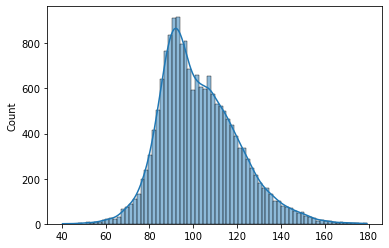

In [18]:
# Visualizando nova população
sns.histplot(pop, kde = True)

In [19]:
# Retirando a amostra
amostra_1 = np.random.choice(pop_3, size = 50)

<AxesSubplot:ylabel='Count'>

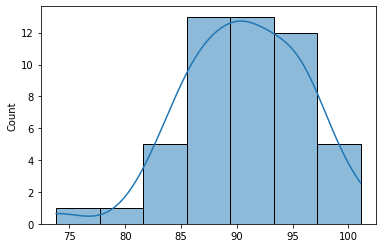

In [21]:
# Visualizando a amostra
sns.histplot(amostra_1, kde = True)

In [22]:
# Teste - t
pg.ttest(x = amostra_1, y = amostra, alternative = 'less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-9.499975,98,less,7.368087e-16,"[-inf, -21.17]",1.899995,6.126e+12,1.0


<br>

## <center>Obrigado pela atenção!

##  <font color = #21618C> Material Elaborado Por:

<tr>
    <td> <img src="imagens/Fernando.png" width = "100" align = "left"/> </td>
</tr>

### Fernando Gioppato

<tr>
    <td> <a href="https://www.linkedin.com/in/fernando-gioppato/" > <img src = "imagens/linkedin.png" width = "25"  align = "left" /> </a></td>             
    <td> <a href="https://github.com/feegioppato" > <img src = "imagens/GitHub-Logo.png" width = "60" height = "100" align = "left" /> </a> </td> 
</tr>

### Referências:
1 - Handbook of Parametric and Nonparametric Statistical Procedures - David J. Sheskin

2 - Think Stats, Exploratory Data Analysis in Python - Allen B. Downey

3 - Statistical Inference for Data Science - Brian Caffo